# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
#written in python 3

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

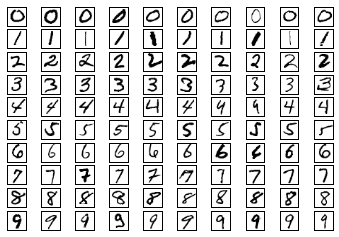

In [3]:
def P1(num_examples=10):
        
### STUDENT START ###
    for i in range(10): 
        k = 0
        for j in range(num_examples):
            
            #loop through the data and plot first 10 samples of each digit
            #for rendering, reshape data of 1x784 into 28x28
            while(train_labels[k] != i):
                k+=1
            ax = plt.subplot(10, num_examples, i * num_examples + j + 1)
            d = np.reshape(train_data[k], (28,28))
            plt.setp(ax, xticks=(), yticks=())
            plt.imshow(d, cmap = 'Greys')
            k+=1
    plt.show()     

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):
    
### STUDENT START ###
    cnames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    #loop through k values and fit models each time
    for i in k_values:
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(mini_train_data, mini_train_labels)
        test_predict_labels = model.predict(dev_data)
        wrong_prediction = (test_predict_labels != dev_labels)
        
        print('K = {0}; accuracy = {1}'.format(i, 1 - np.sum(wrong_prediction)/dev_labels.shape[0]))
        
        #print classification report only for k=1
        if i==1:
            print(classification_report(dev_labels, test_predict_labels, target_names=cnames))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

K = 1; accuracy = 0.888
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

K = 3; accuracy = 0.878
K = 5; accuracy = 0.869
K = 7; accuracy = 0.865
K = 9; accuracy = 0.863


ANSWER: 3 appears to be the most difficult digit. Note the accuracy decreases as K increases.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    #loop through train_sizes and fit 1-NN models
    for tsize in train_sizes:
        ttrain_data, ttrain_labels = train_data[:tsize], train_labels[:tsize]
        
        model = KNeighborsClassifier(n_neighbors = 1)
        model.fit (ttrain_data, ttrain_labels)
        
        #measure time for actual prediction process only
        tstart = time.time()
        test_predict_labels = model.predict (dev_data)
        tend = time.time()
        
        #compute accuraacy and store into accuracies, used as an input later
        wrong_prediction = (test_predict_labels != dev_labels)
        ac = 1 - np.sum(wrong_prediction)/dev_labels.shape[0]
        accuracies.append(ac)
        
        print ('Train Size {}; accuracy = {}; prediction time = {}'.format(tsize, ac, tend - tstart))
        
        #note the prediction time is proportional to the training sizes


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Train Size 100; accuracy = 0.72; prediction time = 0.123046875
Train Size 200; accuracy = 0.786; prediction time = 0.2490234375
Train Size 400; accuracy = 0.841; prediction time = 0.505859375
Train Size 800; accuracy = 0.884; prediction time = 1.0185546875
Train Size 1600; accuracy = 0.902; prediction time = 2.185546875
Train Size 3200; accuracy = 0.926; prediction time = 4.52734375
Train Size 6400; accuracy = 0.937; prediction time = 9.017578125
Train Size 12800; accuracy = 0.959; prediction time = 18.087890625
Train Size 25000; accuracy = 0.97; prediction time = 35.7060546875


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:

def P4():
    
### STUDENT START ###
    
    #convert accuracies into odds ratio
    ac = np.array(accuracies)
    pre_odds = ac/(1-ac)

    model = LinearRegression ()
    model.fit(np.array(train_sizes).reshape(-1,1), pre_odds.reshape(-1,1))
    
    predict_odds = model.predict(np.array([60000]).reshape(-1,1))
    
    #linear model code commented out
    #model.fit(np.array(train_sizes).reshape(-1,1), np.array(accuracies).reshape(-1,1))
    #predict_accuracy = model.predict(np.array([60000]).reshape(-1,1))
    
    #convert odds ratio back into accuracy
    print (predict_odds[0][0]/(predict_odds[0][0]+1))

    

### STUDENT END ###

P4()

0.986785222443


ANSWER:the model predicts 1.243. A value exceeding 100% does not make sense. This happens because X/Y relation is not linear. Increase of accuracy diminishes as size of training data increases. Using odds ratio instead will make sure accuracy never exceeds 100%.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Most confused digits are 4 and 9, with 23 errors


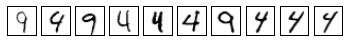

In [7]:
def P5():
        
### STUDENT START ###

    #use only mini_train_data, so accuracy will be lower
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(mini_train_data, mini_train_labels)
    
    test_predict_labels = model.predict(dev_data)
    
    #produce confusion matrix based on prediction outcome and find the most confused pairs
    cm = confusion_matrix(dev_labels, test_predict_labels)
    print (cm)
    
    max_confuse, max_i, max_j = 0, 0, 0
    
    for i in range(10):
        for j in range(i):
            if max_confuse < cm[i][j] + cm[j][i]:
                max_confuse = cm[i][j] + cm[j][i]
                max_i = i
                max_j = j
    print('Most confused digits are {} and {}, with {} errors'.format(max_j, max_i, max_confuse))
    
    #display 10 examples of '4'/'9' confusion
    j=0
    for i in range(len(dev_data)): 
        if j == 10:
            break
        if (dev_labels[i] == 9 and test_predict_labels[i] == 4) or (dev_labels[i] == 4 and test_predict_labels[i] == 9):
            j+=1

            ax = plt.subplot(1, 10, j)
            d = np.reshape(dev_data[i], (28,28))
            plt.setp(ax, xticks=(), yticks=())
            plt.imshow(d, cmap = 'Greys')
                       
    plt.show() 
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
#blurs one digit
def digiblur(t):
    dim = 28
    x = t.reshape(28,28)
    #print(x.shape)
    result = np.zeros ((28,28))
    
    #a more elegant/efficient solution might be building out 9 30x30 np arrays
    #shift the digits accordingly, and take advantage of matrix operations in numpy
    #this still take a long time...
    
    v1 = np.zeros((dim+2, dim+2))
    v1[:28, :28] = x[:,:]
    v2 = np.zeros((dim+2, dim+2))
    v2[1:29, :28] = x[:,:]
    v3 = np.zeros((dim+2, dim+2))
    v3[2:30, :28] = x[:,:]
    v4 = np.zeros((dim+2, dim+2))
    v4[:28, 1:29] = x[:,:]
    v5 = np.zeros((dim+2, dim+2))
    v5[1:29, 1:29] = x[:,:]
    v6 = np.zeros((dim+2, dim+2))
    v6[2:30, 1:29] = x[:,:]
    v7 = np.zeros((dim+2, dim+2))
    v7[:28, 2:30] = x[:,:]
    v8 = np.zeros((dim+2, dim+2))
    v8[1:29, 2:30] = x[:,:]
    v9 = np.zeros((dim+2, dim+2))
    v9[2:30, 2:30] = x[:,:]
    
    v = (v1+v2+v3+v4+v5+v6+v7+v8+v9)/9
    
    result[:,:] = v[1:29,1:29]
    
    return result.reshape(1,784)[0]
    
    #this part runs for loop for the same computation
    #for i in range(x.shape[0]):
        #v = 0
        
        #special case for 4 corners
        #if i == 0:
        #    v = x[i] + x[i+1] + x[i+dim] + x[i+dim+1]
        #elif i == 27:
        #    v = x[i] + x[i-1] + x[i+dim] + x[i+dim-1]
        #elif i == 28*27:
        #    v = x[i] + x[i+1] + x[i-dim] + x[i-dim+1]
        #elif i == 28*28-1:
        #    v = x[i] + x[i-1] + x[i-dim] + x[i-dim-1]
        #special case for 4 sides
        #elif i//28 == 0:
        #    v = x[i-1] + x[i] + x[i+1] + x[i+dim-1] + x[i+dim] + x[i+dim+1]
        #elif i//28 == 27:
        #    v = x[i-1] + x[i] + x[i+1] + x[i-dim-1] + x[i-dim] + x[i-dim+1]
        #elif i%28 == 0:
        #    v = x[i-dim] + x[i] + x[i+dim] + x[i-dim+1] + x[i+1] + x[i+dim+1]
        #elif i%28 == 27:
        #    v = x[i-dim] + x[i] + x[i+dim] + x[i-dim-1] + x[i-1] + x[i+dim-1]
        #normal pixels
        #else:
        #    v = x[i-dim-1] + x[i-dim] + x[i-dim+1] + x[i-1] + x[i] + x[i+1] + x[i+dim-1] + x[i+dim] + x[i+dim+1]
        
        #divide sum by 9 regardless of position of the pixel; this assumes pixels outside of boundary are 0s
        #should not be a big deal in actual practice, as boundary cases tend to be empty anyway
        #result.append(v/9)
        
    #return np.array(result)

def P6():
    
### STUDENT START ###
    
    blur_train, blur_dev = [], []
    for d in train_data:
        blur_train.append (digiblur(d))
    
    for d in dev_data:
        blur_dev.append (digiblur(d))
    
    model = KNeighborsClassifier(n_neighbors = 1)
    
    #noblur
    model.fit(train_data, train_labels)
    ac0 = model.score(dev_data, dev_labels)
    
    #blur training data
    model.fit(blur_train, train_labels)
    ac1 = model.score (dev_data, dev_labels)
    
    #blur dev data
    model.fit(train_data, train_labels)
    ac2 = model.score (blur_dev, dev_labels)
    
    #blur both
    model.fit(blur_train, train_labels)
    ac3 = model.score (blur_dev, dev_labels)
    
    print('''no blur: accuracy = {}
blur training data: accuracy = {}
blur dev data: accuracy = {}
blur both: accuracy = {}'''.format(ac0, ac1, ac2, ac3))

### STUDENT END ###
P6()

no blur: accuracy = 0.977
blur training data: accuracy = 0.982
blur dev data: accuracy = 0.962
blur both: accuracy = 0.979


ANSWER:blurring only training data gave the best result (0.982). Blurring both had tiny improvement (0.979). Blurring only dev data actually made performance worse.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [36]:
#break data into category [0,1,2] at 1/3 marks
def wgb(data):
    wgb_data = np.zeros(data.shape)
    for feature in range(data.shape[1]):
        wgb_data[:, feature] = data[:, feature] > 1/3
        wgb_data[:, feature] += data[:, feature] > 2/3
    return wgb_data

def P7():

### STUDENT START ###

    #Bernoulli,breaking at 0.5 mark
    model = BernoulliNB(binarize = 0.5)
    model.fit (train_data, train_labels)
    
    test_predict_labels = model.predict(dev_data)
    wrong_prediction = (test_predict_labels != dev_labels)
    ac = 1 - np.sum(wrong_prediction)/dev_labels.shape[0]
    
    print(ac)
    
    #compare the results with multinomial
    bin_train = wgb(train_data)
    bin_dev = wgb(dev_data)
    model = MultinomialNB()
    model.fit (bin_train, train_labels)
    
    ac = model.score (bin_dev, dev_labels)
    print(ac)
### STUDENT END ###

P7()

0.845
0.824


ANSWER: the performance of multinomial NB (breaking at 1/3 marks) is slightly worse than bernoulli NB (breaking at 1/2). Ultimately, in MNIST digit recognition, we are working with data of hand writing. Although people write with different strengths, leading to variation in darkness of pixels, the pixels are either "on" or "off" for the larget part. In this case, breaking the values into 3 categories results in overfitting.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [11]:
def P8(alphas):

### STUDENT START ###

    NB = BernoulliNB (binarize = 0.5)
    clf = GridSearchCV (NB, alphas)
    clf.fit (train_data, train_labels)
    
    return clf

### STUDENT END ###

alphas = {'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\etbear\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\etbear\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\etbear\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [12]:
print(nb.grid_scores_)
print (nb.best_params_)

[mean: 0.09892, std: 0.00002, params: {'alpha': 0}, mean: 0.83690, std: 0.00270, params: {'alpha': 0.0001}, mean: 0.83670, std: 0.00266, params: {'alpha': 0.001}, mean: 0.83652, std: 0.00268, params: {'alpha': 0.01}, mean: 0.83615, std: 0.00274, params: {'alpha': 0.1}, mean: 0.83543, std: 0.00269, params: {'alpha': 0.5}, mean: 0.83505, std: 0.00284, params: {'alpha': 1.0}, mean: 0.83452, std: 0.00293, params: {'alpha': 2.0}, mean: 0.83245, std: 0.00271, params: {'alpha': 10.0}]
{'alpha': 0.0001}


ANSWER:alpha=0.0001 performed best. Alpha=0 produced dismal accuracy. Not using any smoothing means the model does not take into account for unobserved data and may lead to performance issue. However, it is still shocking to see such low accuracy. This may have to do with division by zero error the model encounters.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [65]:
def P9():
    ### STUDENT END ###
    #binarize data and adds random noise of normal distribution
    binarize_train = np.zeros(train_data.shape)
    train_zeros = train_data[:,:] == 0
    binarize_train[:,:] = train_data[:,:]>0.5
    binarize_train += np.random.randn(binarize_train.shape[0],binarize_train.shape[1])/6
    
    #simply adding noise to 0's did not work too well
    #binarize_train += train_zeros*np.random.randn(binarize_train.shape[0],binarize_train.shape[1])/16
    #print(binarize_train[1])
    
    binarize_dev = np.zeros (dev_data.shape)
    binarize_dev[:,:] = dev_data[:,:]>0.5
    binarize_dev += np.random.randn(binarize_dev.shape[0],binarize_dev.shape[1])/6

    clf = GaussianNB ()
        
    #clf.sigma_ = 0.2
    clf.fit (binarize_train, train_labels)
    
    ac = clf.score(binarize_dev, dev_labels)
    
    #running GaussianNB on data as is did not work well
    #clf.fit (train_data, train_labels)
    #but if sigma_ is tweaked, this can work reasonably well
    #for i in range(clf.sigma_.shape[0]):
    #    for j in range(clf.sigma_.shape[1]):
    #        if clf.theta_[i,j]==0:
    #            clf.sigma_[i,j]=0.1
    #ac = clf.score(dev_data, dev_labels)
    
    print(ac)
    return clf

### STUDENT END ###

gnb = P9()

0.838


ANSWER: GaussianNB is intended for real-valued features, so it runs into trouble when the data is more binary than continuous. Checking sigma and theta, many mean values are 0, and the variances are small default values. To address the issue, I binarized the data, and added random noise to the data, so it looks more close to normal distributions centered at 0 and 1.  Alternatively, tweaking the sigma_ (the default values) also improves the accuracy to a reasonable level.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

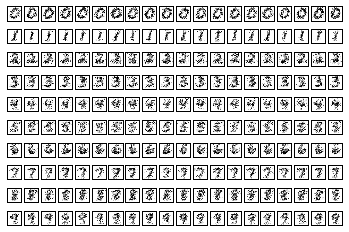

In [19]:
def P10(num_examples):

### STUDENT START ###
    model = BernoulliNB(binarize = 0.5)
    model.fit (train_data, train_labels)
    
    for i in range(10):
        for j in range(num_examples):

            ax = plt.subplot(10, num_examples, i*num_examples+j+1)
            
            #generate random numbers between [0,1], set the pixel to 1 if greater than probablity; 0 otherwise
            digit = np.random.rand(1,train_data.shape[1])[0]
            digit = digit <= np.exp(model.feature_log_prob_[i])
            d = np.reshape(digit, (28,28))
            plt.setp(ax, xticks=(), yticks=())
            plt.imshow(d, cmap = 'Greys')

    plt.show() 
### STUDENT END ###

P10(20)

ANSWER: the generated digits are really blurry. This makes sense because NB model is essentially a probablistic summation of the training data, which will be a collection of fuzziness by nature.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [24]:
#function returns the "bin" prob falls into
def det_bucket (prob, buckets):
    for i in range(len(buckets)):
        if prob < buckets[i]:
            return i
    return i

def P11(buckets, correct, total):
    
### STUDENT START ###

    NB = BernoulliNB(binarize=0.5, alpha=0.0001)
    NB.fit(train_data, train_labels)
    
    prob = NB.predict_proba(dev_data)
    pred_labels = NB.predict (dev_data)
    
    #go through predictions and fill in the bins
    for i in range(len(prob)):
        bin_num = det_bucket(max(prob[i]), buckets)
        total[bin_num] += 1
        correct[bin_num] += (pred_labels[i] == dev_labels[i])
        
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   3    accuracy = 0.333
p(pred) <= 0.9000000000000    total =  40    accuracy = 0.575
p(pred) <= 0.9990000000000    total =  97    accuracy = 0.495
p(pred) <= 0.9999900000000    total =  75    accuracy = 0.640
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.714
p(pred) <= 0.9999999990000    total =  70    accuracy = 0.871
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.893
p(pred) <= 0.9999999999999    total =  81    accuracy = 0.926
p(pred) <= 1.0000000000000    total = 496    accuracy = 0.972


ANSWER: bernoulliNB looks weakly calibrated. There is clear correlation between posterior and accuracy, but posterior is significantly lower than actual accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [264]:
checked_pixel = set()

#start with a pixel, and recurse through neighbors to see if it's possible to reach the boundary
def check_enclosed (digit, y, x):
    #reached a wall
    if digit[y,x]>0:
        return False
    #reached the boundary
    if (x==0 or x==27 or y==0 or y==27) and digit[y,x]==0:
        return True
    check_next = set()
    if (y-1,x) not in checked_pixel:
        check_next.add((y-1,x))
    if (y+1,x) not in checked_pixel:
        check_next.add((y+1,x))
    if (y,x-1) not in checked_pixel:
        check_next.add((y,x-1))
    if (y,x+1) not in checked_pixel:
        check_next.add((y,x+1))
    
    #print (check_next)
    result = False
    for pix in check_next:
        checked_pixel.add(pix)
        result = result or check_enclosed(digit, pix[0], pix[1])
    return result

def proc_data(data):
    #variables used to calculate dimension of new data (after adding features)
    x,y,new_feature = data.shape[0], data.shape[1], 28*2
    
    #binarize the original data at 0.5 mark
    binarize = np.zeros(data.shape)
    binarize[:,:] = data[:,:] > 0.5
    
    #initiate output array with the dimensions
    result = np.zeros((x,y+new_feature))
    result[:,:data.shape[1]] = binarize[:,:]
    
    #adds positions of left most non-zero pixels as features
    for i in range(result.shape[0]):
        t_data = binarize[i].reshape(28,28)
        for j in range(28):
            for first_left in range(28):
                if t_data[j, first_left] > 0:
                    result[i, y+j] = first_left
                    break

    #count number of intersections of each column
    for i in range(result.shape[0]):
        t_data = binarize[i].reshape(28,28)
        for j in range(28):
            num_x, last_bit = 0,0
            #v_dist = 0
            for k in range(28):
                if t_data[k, j] != last_bit:
                    num_x += 1 - last_bit
                    last_bit = 1 - last_bit
            #        if num_x == 1:
            #            v_dist = k
            #        elif num_x == 2:
            #            v_dist = k - v_dist
            #if num_x == 1:
            #    v_dist = 28
            result[i, y+j+28] = num_x
            #result[i, y+j+28*2] = v_dist

    #check whether there is an enclosed region at the top
    #for i in range(result.shape[0]):
    #    t_data = binarize[i].reshape(28,28)
    #    last_bit = 0
    #    checked_pixel = set()
    #    for j in range(28):
    #        if t_data[j, 14] != last_bit:
    #            if last_bit == 1:
    #                result[i, y+28*2] = not check_enclosed(t_data, j, 14)
    #                break
    #            last_bit = 1-last_bit
            
    
    
    #adds positions of top most non-zero pixels as features ==not used==
    #for i in range(result.shape[0]):
    #    t_data = binarize[i].reshape(28,28)
    #    for j in range(28):
    #        for first_top in range(28):
    #            if t_data[first_top, j] > 0:
    #                result[i, y+j+28] = first_top
    #                break
    
    #sums pixels by row ==not used==
    #for i in range(result.shape[0]):
    #    for j in range(28):
    #        result[i,y+j+2*28] = sum(np.reshape(binarize, (binarize.shape[0], 28,28))[i,j,:])
    
    #sums pixels by column ==not used==
    #for i in range(result.shape[0]):
    #    for j in range(28):
    #        result[i,y+j+2*28] = sum(np.reshape(binarize, (binarize.shape[0], 28,28))[i,:,j])
    
    #produces sums of all pixels, sums of top half, sums of bottom half ==not used==
    #for i in range(result.shape[0]):
    #    result[i,-1] = sum(binarize[i,:])
    #    result[i,-1] = sum(binarize[i,:28*14])
    #    result[i,y+2] = round(sum(binarize[i,28*14:]))
    
    return result

def P12():

### STUDENT START ###
    
    #start with a simple multinomialNB; data will be binarized at 0.5 mark
    #use multinomial with the anticipation new features will be a range of integers (round if not integer)
    NB = MultinomialNB(alpha=0.01)
    
    #examines confusion matrix first(.827); 3/5, 4/9 and 7/9 are more problematic pairs
    #getting the left most non-zero pixel might work
    #slight improvement (.835); 4/9 and 7/9 remains problematic (3/5 too)
    #try adding the top most non-zero pixel
    #that made things worse (.811); remove features (7/9 performs very poorly)
    #try adding number of intersections for every column
    #more improvement with this feature (.844); 7/9 still tough
    #try summing pixels of each row
    #things got a bit worse (.835); remove
    #try summing pixels of top half
    #got slightly worse (.841); remove
    #try summing all pixels
    #got worse (.839); remove
    #try summing pixels by columns
    #got quite a bit worse(.821); remove
    #how about the distance between first vertical intersection and the second to help with 4/7/9?
    #nope, things got way worse (.795); remove
    #time to hack together a check for enclosed region
    #really just interested in checking whether top part forms an enclosed region (9 vs. 4/7)
    #that didn't work either; remove
    #we'll leave it at .844 for now. Tweaking the binarization threshold can improve accuracy a bit
    #but don't think it's worth the tinkering
    
    #ideas worth exploring in the future
    # 1. better normalization
    #    People write with different strength
    #    In the samples there is visible variance in thickness (and maybe darkness) of the digits
    #    Taking that into consideration may help produce a better determination of the pixels
    #    E.g. get the mean of all non-zero pixels and binarize relative to the value of eaach digit
    #    Unifying thickness may be considered, but sounds complex
    #    Another idea is to resize the digits and make sure they are in the center
    #    De-skew can be considered, but also requires more work
    # 2. examine overfitting
    #    Maybe multinomial is overfitting
    #    For example, in determining the left most pixel of each row
    #    The feature might work better if we just break the values into categories/regions rather than using actual value
    #    Same applies to pixel count; maybe we want to determine "intersections" vs. "vertical/horizontal" lines
    #    In this case, dividing the values into two categories might work
    # 3. relax check on enclosed loop
    #    In practice, the idea of checking for enclosed loops does not always work
    #    People don't write perfectly to make sure the loops are totally closed
    #    However, they still represent a loop
    #    An idea is to allow small gaps in the checks (i.e. a gap of 1~2 pixels will be allowed)
    #    Overdoing it will also cause problem; need to be careful
    # 4. specific features to distinguish 4, 7, 9
    #    This continues to be the most troublesome for the model
    #    How about building a feature based on the top of the digit looks like?
    #    9 should be rounded; 7 should be a straight line; 4 can be a few things
    #    checking for variances of top most pixels is a possibility
    
    #preprocess data to add features
    proc_train = proc_data(train_data)
    proc_dev = proc_data(dev_data)
    
    #NB.fit(train_data, train_labels)
    #test_predict_labels = NB.predict(dev_data)
    #ac = NB.score(dev_data, dev_labels)
    #print (ac)
    
    NB.fit(proc_train, train_labels)
    test_predict_labels = NB.predict(proc_dev)
    ac = NB.score(proc_dev, dev_labels)
    print (ac)
    
    cm = confusion_matrix(dev_labels, test_predict_labels)
    print (cm)
    
    max_confuse, max_i, max_j = 0, 0, 0
    
    for i in range(10):
        for j in range(i):
            if max_confuse < cm[i][j] + cm[j][i]:
                max_confuse = cm[i][j] + cm[j][i]
                max_i = i
                max_j = j
    print('Most confused digits are {} and {}, with {} errors'.format(max_j, max_i, max_confuse))

    
    #ac = NB.score(proc_dev, dev_labels)
    #print (ac)
    
    #test_predict_labels = NB.predict(proc_dev)
    
### STUDENT END ###

P12()

0.844
[[ 94   0   1   0   0   0   3   0   1   0]
 [  0 101   1   1   0   0   1   0   1   0]
 [  3   1  79   7   0   1   5   1   5   0]
 [  0   1  10  62   1   0   2   1   4   5]
 [  1   0   0   0  85   0   1   0   6  11]
 [  0   0   3  10   2  66   2   2   1   5]
 [  0   2   1   0   1   2  92   0   0   0]
 [  1   0   0   1   1   1   0  89   4  16]
 [  0   3   4   4   0   1   0   0  81   3]
 [  0   0   0   2   0   0   0   6   3  95]]
Most confused digits are 7 and 9, with 22 errors
